# Calibration demonstration
Consider the following definitions:
1. <b>Accuracy:</b> How close a measurement is to the truth.
2. <b>Precision:</b> How close repeated measurements of the same quantity are to one another.

Our aim is to have <b>high accuracy</b> <u>and</u> <b>high precision</b> (i.e., panel d in Fig. 1).
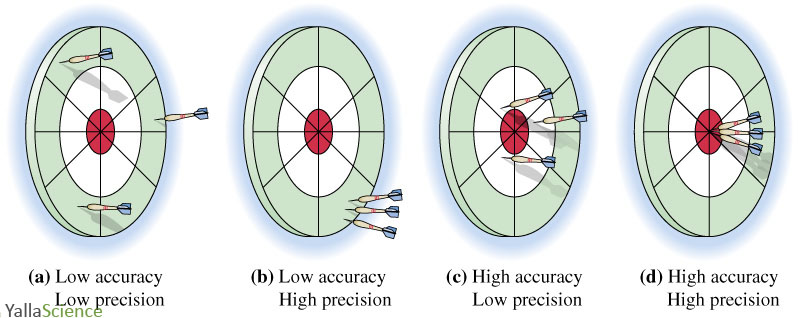

# The two purposes of a linear, static calibration are to:
## 1. <b>Remove the bias</b> (systematic error), thereby increasing the accuracy.
## 2. <b>Characterize the uncertainty</b> (random error), thereby quantifying the precision.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Typically, in a static calibration exercise, we compare a test instrument to a "truth" instrument (one that is known to be accurate and precise). 

For this exercise, you are testing a thermometer for the Oklahoma Mesonet in a calibration chamber (Fig. 2). You've received reports that this particular thermometer is reading a degree or two Celsius too warm. 

The "truth" instrument is the NIST-traceable thermistor inside the chamber. It is accurate to 0.001 degrees C. We will treat its uncertainty as negigible for the moment.

The "test" instrument is the suspect thermometer, whose accuracy and precision are unknown.
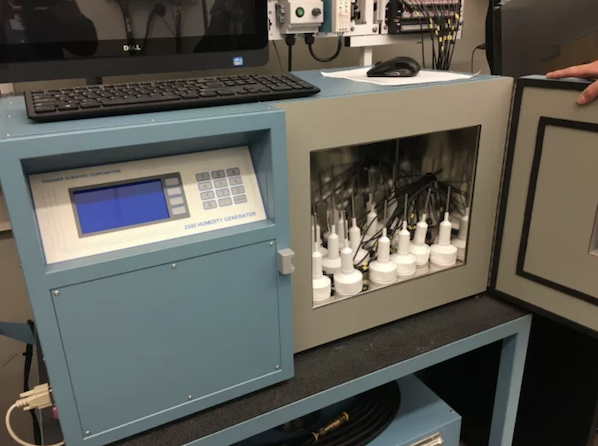
Fig. 2. Hygrothermometer party inside a calibration chamber at the Oklahoma Mesonet. <i>Image courtesy of Dr. Chris Fiebrich.</i>

In [ ]:
truth = np.array([0.00,  1.00,  2.00,  3.00,  4.00,  5.00,  \
                  6.00,  7.00,  8.00,  9.00,  10.00, 11.00, \
                  12.00, 13.00, 14.00, 15.00, 16.00, 17.00, \
                  18.00, 19.00, 20.00])
test  = np.array([1.76,  1.73,  3.77,  3.82,  5.69,  6.12,  \
                  6.75,  8.87,  8.95,  11.17, 10.30, 12.77, \
                  13.20, 14.68, 14.75, 17.19, 18.95, 18.38, \
                  20.45, 21.66, 20.87])

## Just reading the data, we can already tell something is wrong. 
The characterization "a degree or two too warm" appears to be accurate. 

## We can confirm by plotting the data:

In [ ]:
fig = plt.figure(figsize = (8, 8))
ax = plt.subplot(1, 1, 1)
plt.plot(truth, test, '.', color = 'darkred', markersize = 20, label = 'Measurements')
plt.plot(truth, truth, '--', color = 'darkgray', label = '1:1 line')
plt.xlabel('Truth: Chamber temperature (deg C)')
plt.ylabel('Test: Thermometer reading (deg C)')
plt.xlim(0,20)
plt.ylim(0,20)
plt.grid()
plt.title('Thermometer chamber test results')
h = plt.legend()

## If the thermometer was perfectly accurate (i.e., had no bias), then all the test measurements would line up along the 1:1 line. 

However, it's clear that all of them lie above the red line - i.e., the thermometer has a warm bias, as reported. But how warm?

# Let's plot the errors.
The error for the <i>i</i>th measurement is denoted $\varepsilon_{i}$ = test - truth.

In [ ]:
fig = plt.figure(figsize = (8, 8))
ax = plt.subplot(1, 1, 1)
plt.plot(truth, test, '.', color = 'darkred', markersize = 20, label = 'Measurements')
plt.plot(truth, truth, '--', color = 'darkgray', label = '1:1 line')
for n in range(len(truth)):
    plt.plot([n, n], [test[n], truth[n]], 'orange')
plt.xlabel('Truth: Chamber temperature (deg C)')
plt.ylabel('Test: Thermometer reading (deg C)')
plt.xlim(0,20)
plt.ylim(0,20)
plt.grid()
plt.title('Thermometer chamber test results')
plt.text(5.0, 12.5, r'Error $\varepsilon_{i}$', color ='orange', fontsize = 20)
plt.legend()

# The equation for bias $\bar{\varepsilon}$ is:

# $\bar{\varepsilon}=\frac{1}{N} \sum_{i=1}^{N} \varepsilon_{i}$

where $\varepsilon_{i}$ is the <i>error</i> (test minus truth) associated with the <i>i</i>th measurement, and N = 21 is the total number of measurements. 
### It can be seen that bias is simply the arithmetic mean of the errors.

In [ ]:
error = test - truth
print('Error = ', error, 'deg C') # print error values to the screen

N = len(test) # Should be 21
print('N = ', N)

bias = (1 / N) * np.sum(error)
print('Bias = ', bias, 'deg C')

# Again, the characterization "a degree or two too warm" is confirmed.
## Bias can be removed from the test data by subtracting it. 

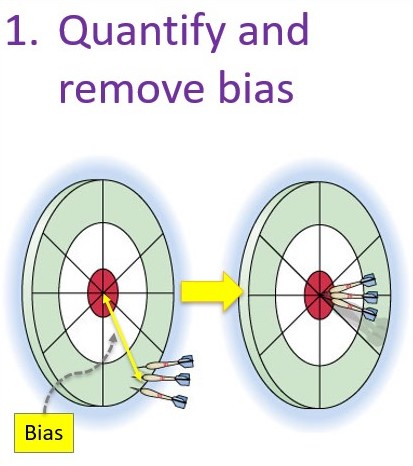


Let's replot the data with the bias removed:

In [ ]:
fig = plt.figure(figsize = (8, 8))
ax = plt.subplot(1, 1, 1)
plt.plot(truth, test, '.', color = 'darkred', markerfacecolor = 'None', markersize = 20, \
         label = 'Measurements', alpha = 0.3) # 'alpha' controls transparency
for n in range(len(truth)):
    plt.plot([n, n], [test[n], test[n]-bias], 'magenta', alpha = 0.3)
plt.plot(truth, test - bias, '.', color = 'darkblue', markersize = 20, label = 'Measurements - bias')
plt.plot(truth, truth, '--', color = 'darkgray', label = '1:1 line')
plt.xlabel('Truth: Chamber temperature (deg C)')
plt.ylabel('Test: Thermometer reading (deg C)')
plt.xlim(0,20)
plt.ylim(0,20)
plt.grid()
plt.title('Thermometer chamber test results')
h = plt.legend()

Note the following:
1. Each data point was shifted down 1.5 deg C (pink lines).
2. Approximately half the points now lie above the red 1:1 line, and half below it. The mean error (i.e., the bias) will be approximately zero.

# Now that the bias has been removed, the second step of the calibration exercise is to characterize the uncertainty.
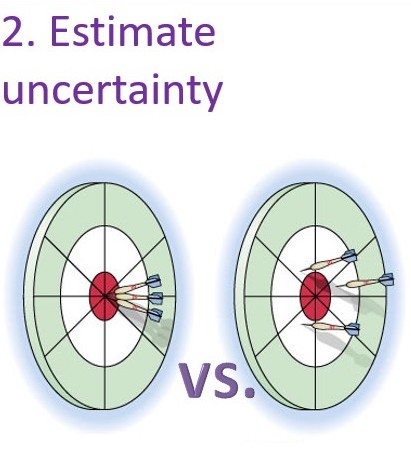

### The equation for uncertainty $\sigma_{\varepsilon}$ is:

# $\sigma_{\varepsilon}=\sqrt{\frac{1}{N-1} \sum_{i=1}^{N}\left(\varepsilon_{i}-\bar{\varepsilon}\right)^{2}}$

In Python code, this equation becomes:

In [ ]:
uncertainty = np.sqrt( (1 / (N - 1)) * np.sum((error - bias) ** 2.) )
print('Uncertainty = ', uncertainty, ' deg C')

## For comparison, WMO recommended thermometer uncertainty is $\pm$ 0.2 deg C. 

Another way to visualize the uncertainty is to draw a normalized histogram of the bias-subtracted errors $\left(\varepsilon_{i}-\bar{\varepsilon}\right)$:

In [ ]:
hist = plt.hist(error - bias, bins = np.arange(-1.5, 1.75, 0.25), density = True)
plt.xlabel('Bias-subtracted error')
plt.ylabel('Probability')
plt.title('Error histogram')
plt.grid()

The distribution of errors is interesting. It has a relative minimum near 0 (the mean) and an apparent bimodal (two-peaked) shape. 

## As a first approximation, we can fit a Gaussian curve to it.

In [ ]:
bins = np.arange(-1.5, 1.75, 0.25)
hist = plt.hist(error - bias, bins = bins, density = True)
plt.xlabel('Bias-subtracted error')
plt.ylabel('Probability')
plt.title('Error histogram')
plt.grid()
plt.plot(hist[1], stats.norm.pdf(bins, 0, uncertainty), color = 'pink', linewidth = 5)

# Right. I'm not buying it either.
Instrument manufacturers repeat their calibrations hundreds, if not thousands, of times. Over time, the cumulative histogram looks more and more Gaussian, like this.

In [ ]:
bins = np.arange(-1.5, 1.75, 0.25)
hist = plt.hist(uncertainty * np.random.randn(20000), bins = bins, density = True)
plt.xlabel('Bias-subtracted error')
plt.ylabel('Probability')
plt.title('Error histogram (20,000 realizations)')
plt.grid()
plt.plot(hist[1], stats.norm.pdf(bins, 0, uncertainty), color = 'pink', linewidth = 5)


## The standard deviation associated with this Gaussian curve is the accuracy reported on the instrument specification sheet!

# In practice, bias can be corrected, but lack of precision cannot be corrected without expensive repairs to the instrument done by the manufacturer.

Let's consider the following limited menu of options:

1. Price to repair (which will eliminate the bias and reduce the uncertainty to $\pm$0.2 deg C): \$700
2. Price to replace with a new, unbiased thermometer with uncertainty $\pm$0.2 deg C : \$700. 

# Would you recommend repairing or replacing this thermometer?

Enter your answer on Brightspace.